## Observations and Insights

## Dependencies and starter code

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, how='inner', on='Mouse ID')
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_group = merged_df.groupby("Drug Regimen")['Tumor Volume (mm3)']
drug_group_mean = drug_group.mean()
drug_group_median = drug_group.median()
drug_group_var = drug_group.var()
drug_group_std = drug_group.std()
drug_group_sem = drug_group.sem()

In [17]:
drug_df = pd.DataFrame(pd.concat({'Mean': drug_group_mean, 'Median': drug_group_median, 'Variance': drug_group_var, 'STD': drug_group_std, 'SEM': drug_group_sem}, axis=1))
drug_df

,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

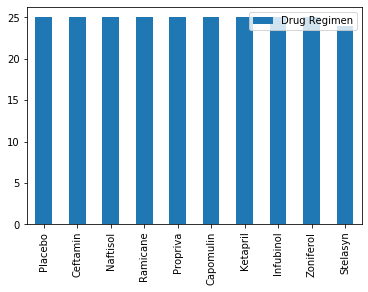

In [52]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
no_dup_df = merged_df.drop_duplicates('Mouse ID', keep='first')
data_points = pd.DataFrame(no_dup_df['Drug Regimen'].value_counts())
data_points.plot.bar()

<BarContainer object of 10 artists>

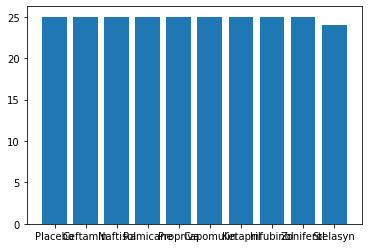

In [26]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
plt.bar(data_points.index, data_points['Drug Regimen'])

## Pie plots

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001D6D9ABF288>],
      dtype=object)

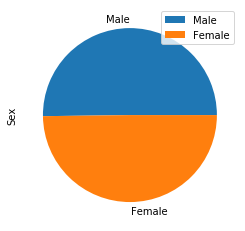

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = pd.DataFrame(no_dup_df['Sex'].value_counts())
gender_df.plot.pie(subplots=True)

([<matplotlib.patches.Wedge at 0x1d6da594f48>,
 [Text(-0.0069391759767656585, 1.0999781124353174, 'Male'),
  Text(0.006939175976765524, -1.0999781124353174, 'Female')])

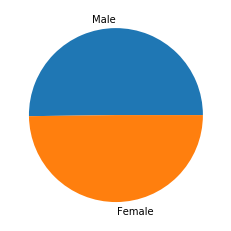

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_df, labels=gender_df.index)

## Quartiles, outliers and boxplots

In [65]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
final_vol = pd.DataFrame(drug_group.tail(1))
final_vol.columns = ['Final Volume']
final_df = pd.merge(final_vol, merged_df, on=index)

NameError: name 'index' is not defined

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen